In [19]:
from sqlalchemy import create_engine
import pandas as pd
%matplotlib inline

engine = create_engine('sqlite:///web/database.db')
conn = engine.connect()

data = pd.read_sql('SELECT * FROM items', conn)

In [20]:
data.dtypes

id            int64
search       object
url          object
source       object
product      object
brand        object
currency     object
price       float64
dtype: object

In [21]:
data.source = data.source.astype('category')
data.search = data.search.astype('category')

In [22]:
data.groupby(by='search').id.count()

search
notebook    19
pen          4
test         5
Name: id, dtype: int64

In [45]:
data.describe()

,id,price
count,11.000000,11.000000
mean,6.000000,949.266364
std,3.316625,654.240951
min,1.000000,2.990000
25%,3.500000,429.990000
50%,6.000000,1000.000000
75%,8.500000,1399.495000
max,11.000000,1889.990000


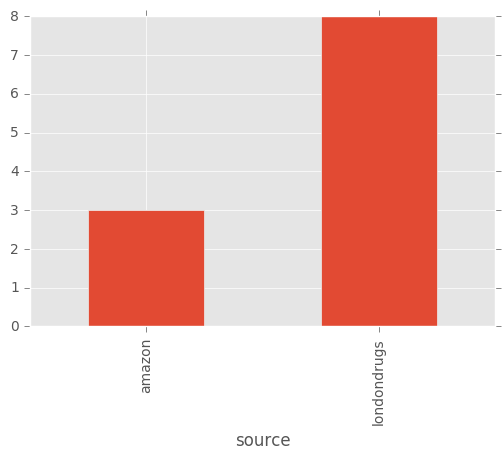

In [51]:
data.pivot(columns='source',values='price').count(axis=0).plot.bar()